In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter

In [2]:
import pandas as pd

csv_file_path = '/Users/zhaosmac/Desktop/BPD_Arrests.csv'
df = pd.read_csv(csv_file_path)

print(df)

                   X              Y   RowID IncidentNumber  ArrestNumber  \
0       1.401347e+06  608148.870493       1       22L09338    23000037.0   
1       1.401347e+06  608148.870493       2       22L09338    23000039.0   
2                NaN            NaN       3            NaN    23000010.0   
3       1.417636e+06  595206.835862       4       22L09343    23000050.0   
4                NaN            NaN       5       22L09312    22157183.0   
...              ...            ...     ...            ...           ...   
367710  1.408062e+06  605113.277780  367711       10A00005    10000039.0   
367711  1.436274e+06  603484.911890  367712       10A00011    10000077.0   
367712  1.401876e+06  594236.816091  367713       10A00009    10000013.0   
367713  1.428992e+06  599772.172473  367714       10A00024    10000018.0   
367714  1.416216e+06  596366.646274  367715       10A00069    10000083.0   

         Age Gender Race          ArrestDateTime      ArrestLocation  ...  \
0       39

In [3]:
import pandas as pd

# Load the 911 calls data
csv_file_path = '/Users/zhaosmac/Desktop/BPD_Arrests.csv'
df = pd.read_csv(csv_file_path)

# Convert 'ArrestDateTime' to datetime format
df['ArrestDateTime'] = pd.to_datetime(df['ArrestDateTime'])

# Filter data for the year 2021
df_2021 = df[(df['ArrestDateTime'] >= '2021-01-01') & (df['ArrestDateTime'] <= '2021-12-31')]

# Display the filtered DataFrame
print(df_2021)

                   X              Y   RowID IncidentNumber  ArrestNumber  \
714     1.420303e+06  593578.779238     715       21L08179    21168254.0   
715     1.399544e+06  606102.975504     716            NaN           NaN   
716     1.436468e+06  604323.597030     717       21L08191    21168255.0   
717              NaN            NaN     718            NaN    21168243.0   
718     1.409703e+06  590149.266588     719       21L08135    21168241.0   
...              ...            ...     ...            ...           ...   
366896  1.421538e+06  602617.070991  366897       21A00044    21000040.0   
366897  1.406816e+06  597714.655880  366898            NaN    21000026.0   
366898           NaN            NaN  366899            NaN    21000004.0   
366899  1.416315e+06  600082.265279  366900       21A00015    21000013.0   
366900  1.415793e+06  596182.827255  366901       21A00013    21000016.0   

         Age Gender Race            ArrestDateTime            ArrestLocation  \
714    

In [9]:
df_2021.head()

,X,Y,RowID,IncidentNumber,ArrestNumber,Age,Gender,Race,ArrestDateTime,ArrestLocation,...,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Latitude,Longitude,GeoLocation,Shape
714,1.420303e+06,593578.779238,715,21L08179,21168254.0,31.0,M,B,2021-12-30 23:47:00+00:00,500 PARK AVE,...,500 PARK AVE,1 1415,COMMON ASSAULT,Central,124.0,Mount Vernon,39.2959,-76.6185,"(39.2959,-76.6185)",NaN
715,1.399544e+06,606102.975504,716,NaN,NaN,38.0,M,B,2021-12-30 23:45:00+00:00,4400 LIBERTY HEIGHTS AVE,...,4400 LIBERTY HEIGHTS AVE,NaN,Unknown Charge,Northwest,622.0,Howard Park,39.3305,-76.6917,"(39.3305,-76.6917)",NaN
716,1.436468e+06,604323.597030,717,21L08191,21168255.0,32.0,F,B,2021-12-30 23:12:00+00:00,4400 SHAMROCK AVE,...,4400 SHAMROCK AVE,1 1415,2ND DEGREE ASSAULT,Northeast,442.0,Parkside,39.3252,-76.5612,"(39.3252,-76.5612)",NaN
717,NaN,NaN,718,NaN,21168243.0,31.0,M,B,2021-12-30 21:57:00+00:00,NaN,...,NaN,1 1415,ASSAULT-SEC DEGREE,NaN,NaN,NaN,NaN,NaN,"(,)",NaN
718,1.409703e+06,590149.266588,719,21L08135,21168241.0,55.0,M,B,2021-12-30 19:35:00+00:00,30 CATHERINE ST,...,30 CATHERINE ST,1 1610,HANDGUN VIOLATION,Southwest,835.0,Shipley Hill,39.2866,-76.6560,"(39.2866,-76.656)",NaN


In [10]:
# 统计每个区域的抓捕人数
arrests_by_district = df_2021['District'].value_counts()

# 打印每个区域的抓捕人数
print(arrests_by_district)


Northeast    607
Central      601
Western      593
Southwest    567
Southeast    484
Northwest    483
Southern     439
Eastern      338
Northern     336
Name: District, dtype: int64


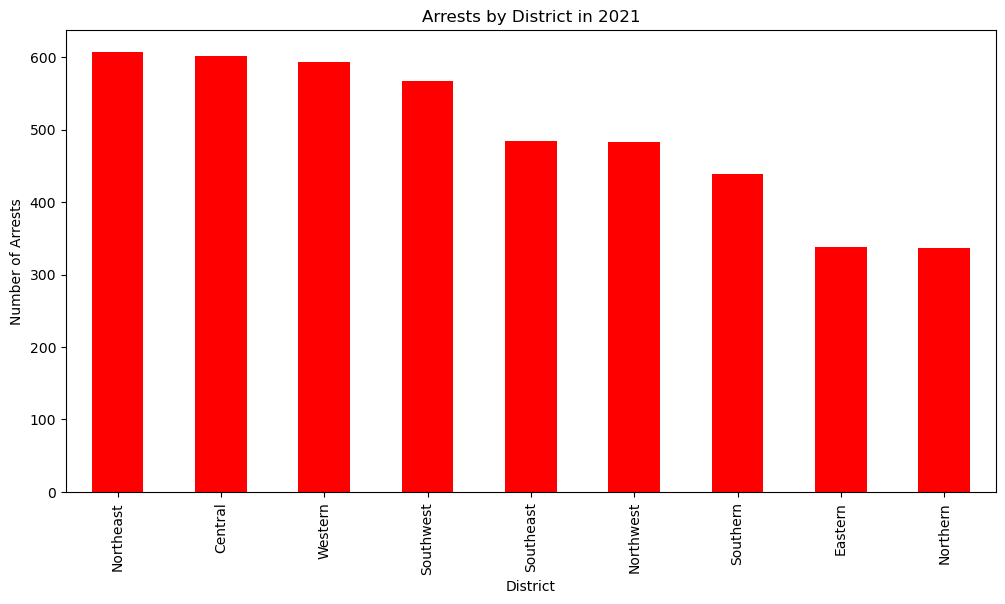

In [15]:
import matplotlib.pyplot as plt

# 设置图形的大小
plt.figure(figsize=(12, 6))

# 绘制条形图
arrests_by_district.plot(kind='bar', color='red')

# 设置图形的标题和标签
plt.title('Arrests by District in 2021')
plt.xlabel('District')
plt.ylabel('Number of Arrests')

# 显示图形
plt.show()


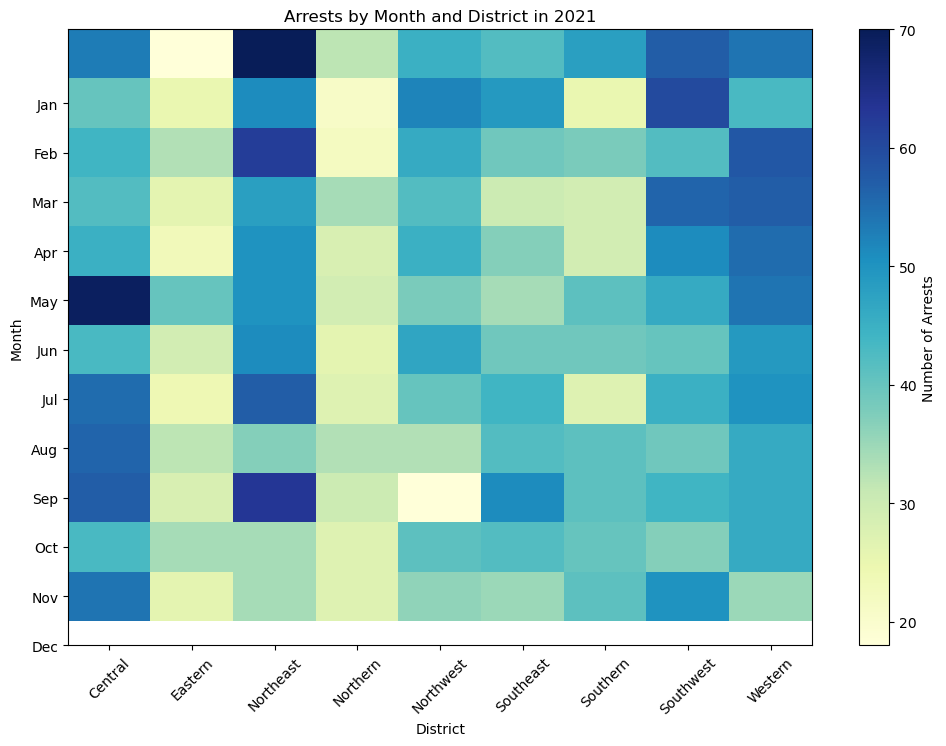

In [16]:
import matplotlib.pyplot as plt

# 将数据框按月和区域分组，并计算每组的抓捕人数
arrests_by_month_district = df_2021.groupby([df_2021['ArrestDateTime'].dt.month, df_2021['District']]).size().unstack()

# 设置图形的大小
plt.figure(figsize=(12, 8))

# 绘制热力图
plt.imshow(arrests_by_month_district, cmap='YlGnBu', aspect='auto')

# 设置图形的标题和标签
plt.title('Arrests by Month and District in 2021')
plt.xlabel('District')
plt.ylabel('Month')

# 显示颜色条
plt.colorbar(label='Number of Arrests')

# 设置 x 轴刻度标签
plt.xticks(range(len(arrests_by_month_district.columns)), arrests_by_month_district.columns, rotation=45)

# 设置 y 轴刻度标签
plt.yticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 显示图形
plt.show()


In [5]:
import pandas as pd

# Load the 911 calls data
csv_file_path = '/Users/zhaosmac/Desktop/BPD_Arrests.csv'
df = pd.read_csv(csv_file_path)

# Convert 'ArrestDateTime' to datetime format
df['ArrestDateTime'] = pd.to_datetime(df['ArrestDateTime'])

# Filter data for the year 2021
df_2021 = df[(df['ArrestDateTime'] >= '2021-01-01') & (df['ArrestDateTime'] <= '2021-12-31')]

# Count the number of arrests in each neighborhood
arrest_counts = df_2021['Neighborhood'].value_counts()

# Display the neighborhood-wise arrest counts
print(arrest_counts)

Downtown               234
Sandtown-Winchester    143
Upton                  123
Frankford              120
Carrollton Ridge       112
                      ... 
Evergreen                1
Oaklee                   1
Overlea                  1
Coldspring               1
Levindale                1
Name: Neighborhood, Length: 255, dtype: int64


In [7]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 600.0 kB/s eta 0:00:00a 0:00:01


In [9]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Display the 'ArrestDateTime' column in the filtered DataFrame
print(df_2021['ArrestDateTime'])

714      2021-12-30 23:47:00+00:00
715      2021-12-30 23:45:00+00:00
716      2021-12-30 23:12:00+00:00
717      2021-12-30 21:57:00+00:00
718      2021-12-30 19:35:00+00:00
                    ...           
366896   2021-01-01 02:38:00+00:00
366897   2021-01-01 02:13:00+00:00
366898   2021-01-01 01:31:00+00:00
366899   2021-01-01 00:50:00+00:00
366900   2021-01-01 00:40:00+00:00
Name: ArrestDateTime, Length: 11206, dtype: datetime64[ns, UTC]


In [5]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


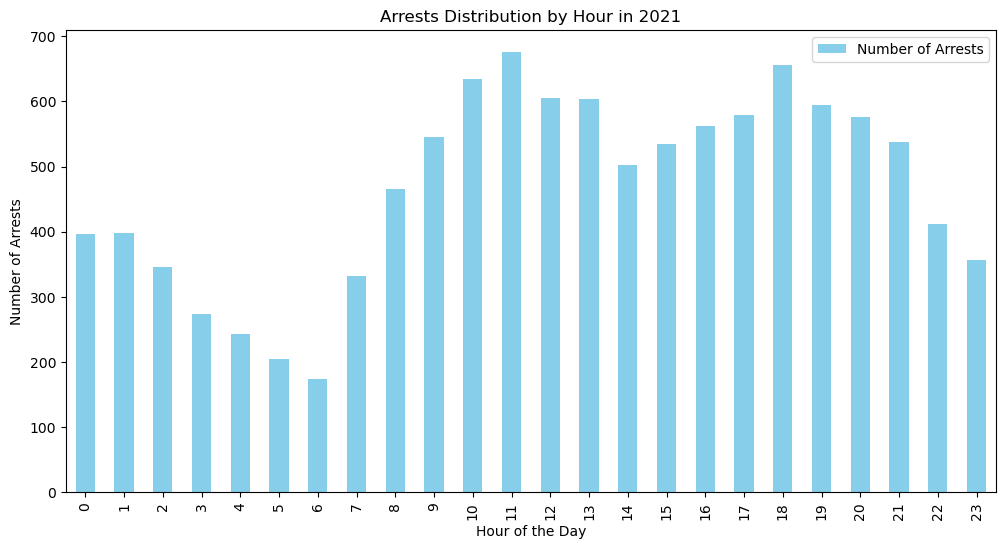

In [6]:
import matplotlib.pyplot as plt

# 设置图形的大小
plt.figure(figsize=(12, 6))

# 绘制直方图
df_2021['ArrestDateTime'].dt.hour.value_counts().sort_index().plot(kind='bar', color='skyblue')

# 设置图形的标题和标签
plt.title('Arrests Distribution by Hour in 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Arrests')

# 显示图例
plt.legend(['Number of Arrests'])

# 显示图形
plt.show()


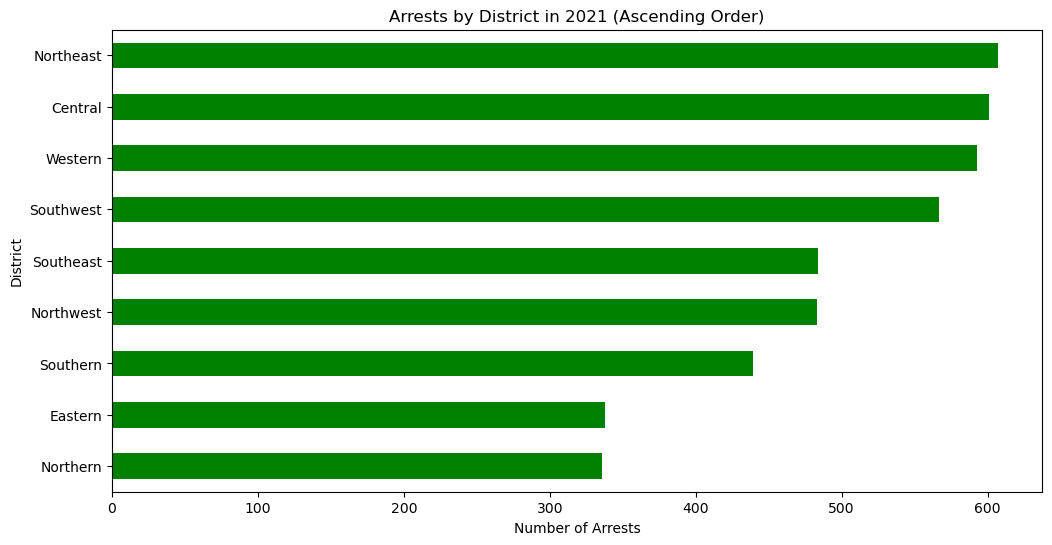

In [20]:
import matplotlib.pyplot as plt

# 按照抓捕人数升序排列
arrests_by_district_sorted = arrests_by_district.sort_values(ascending=True)

# 设置图形的大小
plt.figure(figsize=(12, 6))

# 绘制横向条形图
arrests_by_district_sorted.plot(kind='barh', color='green')

# 设置图形的标题和标签
plt.title('Arrests by District in 2021 (Ascending Order)')
plt.xlabel('Number of Arrests')
plt.ylabel('District')

# 显示图形
plt.show()
